In [ ]:
### API


#### What is API

API（Application Programming Interface，应用程序编程接口）是一些预先定义的函数，目的是提供应用程序与开发人员基于某软件或硬件得以访问一组例程的能力，而又无需访问源码或理解内部工作机制的细节。

#### How do APIs work
根据API的定义，可将API视为交换信息的连接器。但是，API是如何工作的呢？

一个常见的比喻是在餐厅点菜。作为客户，您不能直接向正在准备食物的厨师下订单。取而代之的是，服务员接受您的订单，并将其传达回厨师，然后在准备好食物后将其交付给您。那个服务员就像一个API。

#### Types of APIs

![Figure object](https://img-blog.csdnimg.cn/20200807181201274.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzQyMjIyMzQy,size_16,color_FFFFFF,t_70)

**APIs provide a standard way of accessing any application data, or device**

#### Why we need APIs

- 快速扩展功能
- 提高开发效率
- 降低模块之间的耦合度

### List of APIs 

- pandas_datareader
- tushare, baostock, akshare
- fixer.io
- ...

### pandas_datareader

安装：`pip install pandas-datareader`  
> 下载数据前请将pandas-datareader以及pandas升级到最新版本  
`pip install --upgrade pandas
pip install --upgrade pandas-datareader`

Please refer to its Github Repo for more details: [link here](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html)
#### Data Readers

Functions from **pandas_datareader.data** and **pandas_datareader.wb** extract data from various Internet sources into a pandas DataFrame. Currently the following sources are supported:

- AlphaVantage(X)
- **Federal Reserve Economic Data (FRED)**
- Fama-French Data (Ken French’s Data Library)
- Bank of Canada
- Econdb
- Enigma
- Eurostat
- The Investors Exchange (IEX)(X)
- Moscow Exchange (MOEX)
- **NASDAQ**
- Naver Finance
- Organisation for Economic Co-operation and Development (OECD)
- Quandl(X)
- **Stooq.com**
- Tiingo(X)
- Thrift Savings Plan (TSP)
- **World Bank**

You may not be able to use all datasets. 

#### Data from FRED St.Louis

This example reads 5-years of 10-year constant maturity yields on U.S. government bonds.

In [2]:
import pandas_datareader as pdr
pd = pdr.get_data_fred('GS10')
pd.head()

,GS10
DATE,
2016-11-01,2.14
2016-12-01,2.49
2017-01-01,2.43
2017-02-01,2.42
2017-03-01,2.48


查看数据摘要：

In [4]:
pd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2016-11-01 to 2021-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GS10    59 non-null     float64
dtypes: float64(1)
memory usage: 944.0 bytes


获取GDP数据：

In [2]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2020,1,1)
gdp = web.DataReader('GDP', 'fred', start, end)
gdp.head()

,GDP
DATE,
2015-01-01,18003.399
2015-04-01,18223.577
2015-07-01,18347.425
2015-10-01,18378.803
2016-01-01,18470.156


#### Data from World Bank

pandas users can easily access thousands of panel data series from the World Bank’s World Development Indicators by using the wb I/O functions.

Either from exploring the World Bank site, or using the search function included, every world bank indicator is accessible.

例如，如果要比较北美以固定美元计算的人均国内生产总值，可以使用搜索功能：

In [23]:
from pandas_datareader import wb
matches = wb.search('gdp.*capita.*const')

print(matches)

                         id  \
716      6.0.GDPpc_constant   
10384        NY.GDP.PCAP.KD   
10386        NY.GDP.PCAP.KN   
10388     NY.GDP.PCAP.PP.KD   
10389  NY.GDP.PCAP.PP.KD.87   

                                                    name unit  \
716    GDP per capita, PPP (constant 2011 internation...        
10384                 GDP per capita (constant 2010 US$)        
10386                      GDP per capita (constant LCU)        
10388  GDP per capita, PPP (constant 2017 internation...        
10389  GDP per capita, PPP (constant 1987 internation...        

                             source  \
716                  LAC Equity Lab   
10384  World Development Indicators   
10386  World Development Indicators   
10388  World Development Indicators   
10389         WDI Database Archives   

                                              sourceNote  \
716    GDP per capita based on purchasing power parit...   
10384  GDP per capita is gross domestic product divid...   
10386  

然后，您将使用下载功能从世界银行的服务器获取数据：

In [24]:
dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX'], start=2005, end=2008)

print(dat)

                    NY.GDP.PCAP.KD
country       year                
Canada        2008    48611.791806
              2007    48650.855933
              2006    45968.244184
              2005    44577.993393
Mexico        2008     9587.636253
              2007     9622.047869
              2006     9547.333393
              2005     9270.656892
United States 2008    49319.478865
              2007    49856.281490
              2006    49405.767297
              2005    48499.812376


生成的数据集是具有层次索引的正确格式的数据帧，因此易于应用groupby转换：

In [25]:
dat['NY.GDP.PCAP.KD'].groupby(level=0).mean()

country
Canada           46952.221329
Mexico            9506.918602
United States    49270.335007
Name: NY.GDP.PCAP.KD, dtype: float64

### Data from stooq

Google finance doesn’t provide common index data download. The Stooq site has the data for download.

获取道琼斯指数价格：

In [12]:
import pandas_datareader.data as web

f = web.DataReader('^DJI', 'stooq')
f.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-10-22,35607.72,35765.02,35533.95,35677.02,377998070
2021-10-21,35520.32,35612.36,35442.53,35603.08,341046446
2021-10-20,35475.16,35669.69,35465.71,35609.34,301816501
2021-10-19,35325.37,35462.68,35290.12,35457.31,314648025
2021-10-18,35221.02,35327.57,35035.94,35258.61,358473544


### Data from Nasdaq Trader Symbol Definitions

Download the latest symbols from Nasdaq.

Note that Nasdaq updates this file daily, and historical versions are not available. More information on the field definitions.

In [7]:
import pandas_datareader as pdr

df = pdr.nasdaq_trader.get_nasdaq_symbols()
df

,Nasdaq Traded,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
Symbol,,,,,,,,,,,
A,True,"Agilent Technologies, Inc. Common Stock",N,,False,100.0,False,NaN,A,A,False
AA,True,Alcoa Corporation Common Stock,N,,False,100.0,False,NaN,AA,AA,False
AAA,True,Listed Funds Trust AAF First Priority CLO Bond...,P,,True,100.0,False,NaN,AAA,AAA,False
AAAU,True,Goldman Sachs Physical Gold ETF Shares,P,,True,100.0,False,NaN,AAAU,AAAU,False
AAC,True,Ares Acquisition Corporation Class A Ordinary ...,N,,False,100.0,False,NaN,AAC,AAC,False
...,...,...,...,...,...,...,...,...,...,...,...
ZXZZT,True,NASDAQ TEST STOCK,Q,G,False,100.0,True,N,NaN,ZXZZT,False
ZY,True,Zymergen Inc. - Common Stock,Q,Q,False,100.0,False,N,NaN,ZY,False
ZYME,True,Zymeworks Inc. Common Shares,N,,False,100.0,False,NaN,ZYME,ZYME,False


In [6]:
df.loc['IBM']

Nasdaq Traded                                                    True
Security Name       International Business Machines Corporation Co...
Listing Exchange                                                    N
Market Category                                                      
ETF                                                             False
Round Lot Size                                                  100.0
Test Issue                                                      False
Financial Status                                                  NaN
CQS Symbol                                                        IBM
NASDAQ Symbol                                                     IBM
NextShares                                                      False
Name: IBM, dtype: object

#### Data from Yahoo

A substitute：[yahoofinancials API](https://pypi.org/project/yahoofinancials/)

In [8]:
# Get data from Yahoo
import pandas as pd
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2019, 1, 1) # or start = '1/1/2016'
end = datetime.date.today()
prices = web.DataReader('IBM', 'yahoo', start, end)
prices.tail()

# df = web.DataReader('GE', 'yahoo', start='2019-09-10', end='2019-10-30')
# df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-18,144.940002,141.759995,144.000000,142.320007,6154100.0,142.320007
2021-10-19,142.940002,140.520004,141.080002,141.979996,4339500.0,141.979996
2021-10-20,142.199997,140.699997,141.679993,141.899994,6189300.0,141.899994
2021-10-21,133.720001,128.100006,133.509995,128.330002,31466500.0,128.330002
2021-10-22,130.250000,126.610001,128.050003,127.879997,11569200.0,127.879997


**Exercise：**

- 请大家结合上述实例，使用pandas-datareader从oecd获取名称为‘TUD’的数据集。

### tushare

https://tushare.pro/document/2

- 下载安装

`pip install tushare`

如果安装网络超时可尝试国内pip源，如pip install tushare -i https://pypi.tuna.tsinghua.edu.cn/simple

- 版本升级

`pip install tushare --upgrade`

- 查看当前版本

`import tushare`  
`print(tushare.__version__)`

In [27]:
import tushare as ts

# 请在 tushare.pro 网站注册并且告知学生身份，可以取得你的token
tushare_token = '1c8b06446534ae510c8c68e38fc248b99f89ac3814cb55645ae2be72'  
pro = ts.pro_api(tushare_token)

df = pro.daily(ts_code='000001.SZ', start_date='20180701', end_date='20200718')

print(df)

       ts_code trade_date   open   high    low  close  pre_close  change  \
0    000001.SZ   20200717  14.17  14.28  13.95  14.14      14.15   -0.01   
1    000001.SZ   20200716  14.30  14.55  14.12  14.15      14.27   -0.12   
2    000001.SZ   20200715  14.78  14.86  14.23  14.27      14.68   -0.41   
3    000001.SZ   20200714  14.90  15.19  14.55  14.68      14.89   -0.21   
4    000001.SZ   20200713  14.70  15.08  14.50  14.89      14.86    0.03   
..         ...        ...    ...    ...    ...    ...        ...     ...   
493  000001.SZ   20180706   8.61   8.78   8.45   8.66       8.60    0.06   
494  000001.SZ   20180705   8.62   8.73   8.55   8.60       8.61   -0.01   
495  000001.SZ   20180704   8.63   8.75   8.61   8.61       8.67   -0.06   
496  000001.SZ   20180703   8.69   8.70   8.45   8.67       8.61    0.06   
497  000001.SZ   20180702   9.05   9.05   8.55   8.61       9.09   -0.48   

     pct_chg         vol       amount  
0    -0.0707  1291346.77  1821043.927  
1    -0

### AKshare

- 安装：`pip install akshare`

- [官网](https://www.akshare.xyz/)

示例：

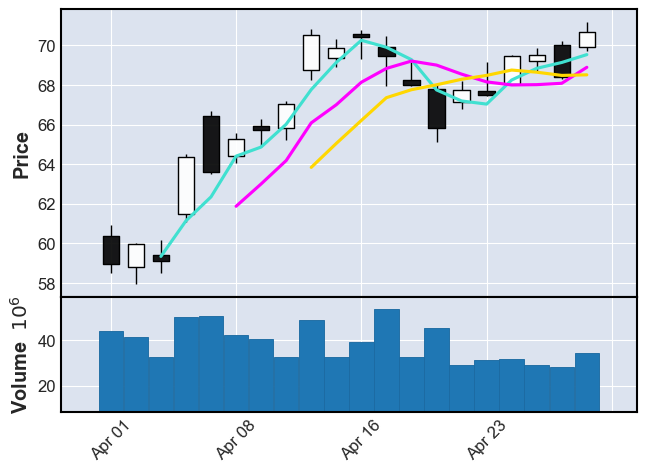

In [45]:
import akshare as ak
import mplfinance as mpf  # Please install mplfinance as follows: pip install mplfinance

stock_us_daily_df = ak.stock_us_daily(symbol="AAPL", adjust="qfq")
stock_us_daily_df = stock_us_daily_df[["open", "high", "low", "close", "volume"]]
stock_us_daily_df.columns = ["Open", "High", "Low", "Close", "Volume"]
stock_us_daily_df.index.name = "Date"
stock_us_daily_df = stock_us_daily_df["2020-04-01": "2020-04-29"]
mpf.plot(stock_us_daily_df, type='candle', mav=(3, 6, 9), volume=True, show_nontrading=False)

### BaoStock

- 安装：`pip install baostock`

- [官网](http://baostock.com/baostock/index.php/%E9%A6%96%E9%A1%B5)

示例：

In [43]:
import baostock as bs
import pandas as pd

# 登陆系统
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

# 获取指数(综合指数、规模指数、一级行业指数、二级行业指数、策略指数、成长指数、价值指数、主题指数)K线数据
# 综合指数，例如：sh.000001 上证指数，sz.399106 深证综指 等；
# 规模指数，例如：sh.000016 上证50，sh.000300 沪深300，sh.000905 中证500，sz.399001 深证成指等；
# 一级行业指数，例如：sh.000037 上证医药，sz.399433 国证交运 等；
# 二级行业指数，例如：sh.000952 300地产，sz.399951 300银行 等；
# 策略指数，例如：sh.000050 50等权，sh.000982 500等权 等；
# 成长指数，例如：sz.399376 小盘成长 等；
# 价值指数，例如：sh.000029 180价值 等；
# 主题指数，例如：sh.000015 红利指数，sh.000063 上证周期 等；


# 详细指标参数，参见“历史行情指标参数”章节；“周月线”参数与“日线”参数不同。
# 周月线指标：date,code,open,high,low,close,volume,amount,adjustflag,turn,pctChg
rs = bs.query_history_k_data_plus("sh.000001",
    "date,code,open,high,low,close,preclose,volume,amount,pctChg",
    start_date='2017-01-01', end_date='2017-06-30', frequency="d")
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

# df=rs.get_data()
# 打印结果集
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)
# 结果集输出到csv文件
result.to_csv("history_Index_k_data.csv", index=False)
print(result)

# 登出系统
bs.logout()

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
           date       code       open       high        low      close  \
0    2017-01-03  sh.000001  3105.3080  3136.4550  3105.3080  3135.9200   
1    2017-01-04  sh.000001  3133.7870  3160.1020  3130.1140  3158.7940   
2    2017-01-05  sh.000001  3157.9060  3168.5020  3154.2810  3165.4100   
3    2017-01-06  sh.000001  3163.7760  3172.0340  3153.0250  3154.3210   
4    2017-01-09  sh.000001  3148.5310  3173.1360  3147.7350  3171.2360   
..          ...        ...        ...        ...        ...        ...   
114  2017-06-26  sh.000001  3157.0020  3187.8890  3156.9760  3185.4430   
115  2017-06-27  sh.000001  3183.4190  3193.4610  3172.4630  3191.1960   
116  2017-06-28  sh.000001  3183.6330  3193.4390  3170.7850  3173.2010   
117  2017-06-29  sh.000001  3174.9810  3188.7740  3174.2830  3188.0620   
118  2017-0

### Fixer.io

Fixer API由15个以上的汇率数据源提供支持，能够提供170种世界货币的实时汇率数据。API附带多个端点，每个端点服务于不同的用例。端点功能包括获取所有或特定货币集的最新汇率数据、将金额从一种货币转换为另一种货币、检索一种或多种货币的时间序列数据以及查询API以获取每日波动数据。  
在本文档中，您将了解API结构、方法、潜在错误和代码示例。如果有任何问题没有答案，请务必联系我们，我们的团队将乐意提供帮助。
https://fixer.io/documentation

**You need to sign in and get an access key to kick off** 

In [26]:
def get_fixer_hist(date, symbols = 'USD,AUD,CAD,CNY,CHF,GBP,HKD'):
    import requests
    import json
    # get the data from fixerAPI
    # You need to sign in to obtain a free access_key 
    access_key = '0287efab831449699ce8333ec5307d00'
    root_url = 'http://data.fixer.io/api/'
    # Make the URL
    url = root_url + date +'?'+ 'access_key='+ access_key + '&symbols=' + symbols + '&format=1'
    # Creat a header
    headers = {'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.133 Safari/534.16'}
    # request data from API
    res = requests.get(url, headers = headers)
    # Get content, in case of Chinese we need to encode
    content = res.text
    # Load JSON data
    dcon = json.loads(content)
    return dcon['date'], dcon['rates'], url

dat = input('Please input a date with a proper format YYYY-MM-DD:')
date, rates, url = get_fixer_hist(dat)
print('Exchange Rate on {}:'.format(date))
for key,values in rates.items():
    print('1 '+ key +' = '+ str(values) +' EUR')

Please input a date with a proper format YYYY-MM-DD: 2020-01-10


Exchange Rate on 2020-01-10:
1 USD = 1.111971 EUR
1 AUD = 1.611471 EUR
1 CAD = 1.451323 EUR
1 CNY = 7.69451 EUR
1 CHF = 1.081752 EUR
1 GBP = 0.851172 EUR
1 HKD = 8.636178 EUR


#### requests第三方库

The requests module allows you to send HTTP requests using Python.

The HTTP request returns a `Response Object` with all the response data (content, encoding, status, etc).


Detail: https://requests.readthedocs.io/en/master/

In [ ]:
import requests

r=requests.get("http://www.baidu.com")
r.status_code
r.encoding='utf-8'
r.text


#### requests库的7种方法
```
requests.requests()   构造一个请求，支撑以下各方法的基础方法
requests.get()        获取HTML网页的主要方法
requests.head()       获取HTML网页头部信息的方法
requests.post()
requests.put()
requests.patch()
requests.delete()
```

**Syntax：** `r = requests.get(url, params=None, kwargs)`
```
url: 拟获取页面的url链接；
params：url中的额外参数，字典或字节流格式，可选；
kwargs：12个控制访问的参数
```
**Reponse对象的属性：**
```
r.status_code HTTP请求的返回状态，200表示成功，404表示失败
r.text HTTP响应内容的字符串形式，即，url对应的页面内容
r.encoding 从HTTP header中猜测的响应内容编码方式
r.apparent_encoding 从内容中分析出的响应内容编码方式（备选编码方式）
r.content HTTP响应内容的二进制形式
```

**Exercise：**
    
- 请大家使用requests库去获取你感兴趣的网页，并查看response对象的属性。
- 思考如何使用urllib库实现上述功能。

#### JSON

JSON(JavaScript Object Notation, JS 对象表示法) 是一种轻量级的数据交换格式。它基于 ECMAScript (欧洲计算机协会制定的js规范)的一个子集，采用完全独立于编程语言的文本格式来存储和表示数据。简洁和清晰的层次结构使得 JSON 成为理想的数据交换语言。 易于人阅读和编写，同时也易于机器解析和生成，并有效地提升网络传输效率。

Python3 中可以使用 json 模块来对 JSON 数据进行编解码，它包含了两个函数：

- json.dumps(): 对数据进行编码。
- json.loads(): 对数据进行解码。

**Exercise:**

- 阅读上述代码，并尝试从fixerAPI获取最新一日的美元兑欧元汇率。

### 思考

- 从tushare下载到股票的日线行情数据后，如何将返回的trade_date作为数据的index？对于数据中的缺失值和异常值应如何处理？

- 在使用requests获取网页的时候，不同的网页是否会报错？应如何处理？